In [116]:
# TODO: package pythonutil scripts and Build\ Figures.py into one .py? Just cat them maybe perchance

!jupyter nbconvert --to script Build\ Figures.ipynb

# Example command line usage:
#   $ cat bhl.nq | ipython Build\ Figures.py BHL
# which will save results to ./bhl-analysis/ and annotated figures will be titled "BHL"

[NbConvertApp] Converting notebook Build Figures.ipynb to script
[NbConvertApp] Writing 30202 bytes to Build Figures.py


In [2]:
includeLegend = False
includeTitle = False
figureDpi = 300

**BEWARE** - these scripts may require a LOT of memory and take quite a long time to complete

In [3]:
INTERACTIVE = (get_ipython().__class__.__name__ == "ZMQInteractiveShell")
print("Interactive mode: " + str(INTERACTIVE))

Interactive mode: True


In [4]:
import sys

import numpy as np
import pandas as pd
from enum import Enum

from pythonutil.patterns import statement_pattern
from pythonutil.terms import *
from pythonutil.prestongraph import *

### Get provenance log

On a large preston.acis.ufl.edu observatory it can take a while to run ```preston ls```, so we store its output at a temporary location
```shell
preston ls --remote http://preston.acis.ufl.edu > tmp/nquads
```

### Index the provenance logs

In [5]:
class Observatory:
    def __init__(self, name, dataPath=None, outputPath=None):
        self.name = name
        self.dataPath = dataPath
        self.index = None
        
        if outputPath is not None:
            self.outputPath = outputPath + "/"
        else:
            self.outputPath = "./" + name.lower().replace(" ", "-") + "-analysis/"

In [6]:
indexTerms = {
    DESCRIPTION,
    HAS_QUALIFIED_GENERATION,
    STARTED_AT_TIME,
    USED,
    WAS_INFLUENCED_BY, # changed from "ACTIVITY" to distinguish between "activity" and "Activity"
    WAS_INFORMED_BY
}

def MakeIndexFromLogs(paths):
    #import sys
    #import io
    index = Index()
    global nQuad
    global line

    # Parse the provenance log into a list of n-quads
    if paths == None:
        print("Reading from stdin...")
        for line in sys.stdin:
            index.Ingest(str(line))
    else:
        if type(paths) == str:
            paths = [paths]

        for path in paths:
            print("Reading from %s..." % path)
            with open(path) as file:
                for line in file:
                    nQuad = statement_pattern.match(str(line))
                    if "predicate" in nQuad.groupdict() and nQuad["predicate"] in indexTerms:
                        index.Ingest(str(line))

    return index

In [7]:
observatories = []

In [8]:
# observatories.append(Observatory("iDigBio", "../zenodo_deeplinker/idigbio.nq"))

In [9]:
# observatories.append(Observatory("GBIF", "../zenodo_deeplinker/gbif.nq"))

In [10]:
# observatories.append(Observatory("DataONE", "../zenodo_dataone/nquads"))

In [11]:
observatories.append(Observatory("BHL", "./bhl.nq"))

In [12]:
# observatories.append(Observatory("Deeplinker", "../zenodo_deeplinker/nquads"))

In [13]:
# observatories.append(Observatory("GNV", "./gnv.nq"))

In [14]:
# observatories.append(Observatory("All", [x.dataPath for x in observatories]))

In [15]:
# If not in Jupyter, use stdin (dataPath=None) as input
if not INTERACTIVE:
    name = sys.argv[1] if len(sys.argv) > 1 else "Network"
    output_path = sys.argv[2] if len(sys.argv) > 2 else None
    
    observatories = [
        Observatory(name=name, dataPath=None, outputPath=output_path)
    ]

    print("Name: " + observatories[0].name)
    print("Output: " + observatories[0].outputPath)

In [16]:
%%time

import os

for observatory in observatories:
    if observatory.index is not None:
        print("Skipping %s; already loaded" % observatory.name)
        continue

    # Prepare a place to store results
    try:
        os.mkdir(observatory.outputPath)
    except OSError:
        pass

    # Make an index
    print("Reading %s..." % observatory.name)
    %time observatory.index = MakeIndexFromLogs(observatory.dataPath)
    print("Done reading %s\n" % observatory.name)

Reading BHL...
Reading from ./bhl.nq...
CPU times: user 4min 53s, sys: 14.9 s, total: 5min 8s
Wall time: 5min 8s
Done reading BHL

CPU times: user 4min 53s, sys: 14.9 s, total: 5min 8s
Wall time: 5min 8s


In [17]:
observatory = observatories[0]
observatoryName = observatory.name
fullIndex = observatory.index
outputPath = observatory.outputPath
dataPath = observatory.dataPath
print("Using network \"%s\"" % observatoryName)
print("Saving output in " + outputPath)

if fullIndex == None:
    print("Uh oh! Failed to parse input. Aborting")
    exit()

Using network "BHL"
Saving output in ./bhl-analysis/


In [18]:
fullIndex.verbLookup

{'<http://purl.org/dc/terms/description>': <pythonutil.prestongraph.Verb at 0x7fc252316ac8>,
 '<http://www.w3.org/ns/prov#startedAtTime>': <pythonutil.prestongraph.Verb at 0x7fc252316e48>,
 '<http://www.w3.org/ns/prov#qualifiedGeneration>': <pythonutil.prestongraph.Verb at 0x7fc252316fd0>,
 '<http://www.w3.org/ns/prov#activity>': <pythonutil.prestongraph.Verb at 0x7fc2523470f0>,
 '<http://www.w3.org/ns/prov#used>': <pythonutil.prestongraph.Verb at 0x7fc252347198>}

In [19]:
for x in fullIndex.verbLookup[STARTED_AT_TIME].statements: print(x)

<5e092894-4aae-4b5d-b07b-925f4251725a>	<http://www.w3.org/ns/prov#startedAtTime>	"2019-10-01T11:40:13.365Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>
<71d81267-4370-4b48-a384-b80f6e58919c>	<http://www.w3.org/ns/prov#startedAtTime>	"2019-06-01T00:36:19.222Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>
<d8afa467-0bd4-4fa8-b618-2944e96bb7d0>	<http://www.w3.org/ns/prov#startedAtTime>	"2019-09-01T09:06:39.430Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>
<f3cfd1e7-2b32-4b28-8c6b-607dccffa636>	<http://www.w3.org/ns/prov#startedAtTime>	"2019-08-01T11:59:32.756Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>
<a554958b-171f-43b6-a369-45f3c695e494>	<http://www.w3.org/ns/prov#startedAtTime>	"2019-07-01T18:50:09.802Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>
<21014813-c4f0-48cd-9046-e7d55e7702da>	<http://www.w3.org/ns/prov#startedAtTime>	"2019-10-13T23:27:52.877Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>
<e9de00b7-7a4f-4e47-aa2d-986811ea009c>	<http://www.w3.org/ns/prov#startedAtTime>	"

In [20]:
print("{:,}".format(len(fullIndex.nodes)), "nodes")

2,159,851 nodes


In [21]:
# formats = set()

# for x in fullIndex.verbLookup["http://purl.org/dc/elements/1.1/format"].triples:
#     formats.add(x.object)

# for x in formats: print(x)

In [22]:
for x in fullIndex.verbs: print(x)

<http://www.w3.org/ns/prov#activity>
<http://purl.org/dc/terms/description>
<http://www.w3.org/ns/prov#startedAtTime>
<http://www.w3.org/ns/prov#used>
<http://www.w3.org/ns/prov#qualifiedGeneration>


In [23]:
def PrintNodeSubTree(node, maxDepth=1, root=True):
    if root:
        for x in node.inwardStatements:
            print(x)

    if maxDepth > 0:
        for x in node.outwardStatements:
            print(x)
            PrintNodeSubTree(x.object, maxDepth - 1, False)

def Peek(nativeSet):
    if len(nativeSet) == 0:
        return None
    else:
        item = nativeSet.pop()
        nativeSet.add(item)
        return item

def ContentIsMissing(content):
    return str(content).startswith("<http")

### Get crawl UUIDs and sort them by date

In [24]:
class CrawlMeta:
    def __init__(self, position, date):
        # Properties
        self.position = position
        self.date = date

In [25]:
fullIndex.verbLookup[STARTED_AT_TIME].statements

{<pythonutil.prestongraph.Statement at 0x7fc213538400>,
 <pythonutil.prestongraph.Statement at 0x7fc2523162e8>}

In [26]:
checkDescription = (DESCRIPTION in fullIndex.verbLookup)
startDate = "\"2019-03-01"
endDate = "\"2019-10-1"

crawlDates = []
for statement in fullIndex.verbLookup[STARTED_AT_TIME].statements:
    crawlUuid = statement.subject
    crawlDate = statement.object

    if crawlDate < startDate:
        print("Ignoring early crawl log %s (\"%s\")" % (str(crawlUuid), str(crawlDate)))
    else:
        if checkDescription:
            descriptionStatement = Peek(crawlUuid.outwardStatements & fullIndex.verbLookup[DESCRIPTION].statements)
            if descriptionStatement is None or descriptionStatement.object == "\"A crawl event that discovers biodiversity archives.\"@en":
                crawlDates.append((crawlUuid, crawlDate))
            else:
                print("Ignoring non-crawl log %s (\"%s\")" % (str(crawlUuid), str(descriptionStatement.object)))
        else:
            crawlDates.append((crawlUuid, crawlDate))
numCrawls = len(crawlDates)

crawlDates.sort(key=lambda x: x[1])

print()
# Assign some helpful metadata to each crawl
crawlMetaLookup = dict()
for i, crawlDate in enumerate(crawlDates):
    # Tag crawl nodes with their chronological position in the preston history
    crawlMeta = CrawlMeta(
        position=i,
        date=crawlDate[1]
    )

    crawlMetaLookup[crawlDate[0]] = crawlMeta

    print("%s\t%s\t%d" % (crawlDate[0], crawlMeta.date, crawlMeta.position))

Ignoring non-crawl log <21014813-c4f0-48cd-9046-e7d55e7702da> (""An event that (re-) processes existing biodiversity datasets graphs and their provenance."@en")

<e9de00b7-7a4f-4e47-aa2d-986811ea009c>	"2019-05-13T17:10:37.661Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>	0
<71d81267-4370-4b48-a384-b80f6e58919c>	"2019-06-01T00:36:19.222Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>	1
<a554958b-171f-43b6-a369-45f3c695e494>	"2019-07-01T18:50:09.802Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>	2
<f3cfd1e7-2b32-4b28-8c6b-607dccffa636>	"2019-08-01T11:59:32.756Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>	3
<d8afa467-0bd4-4fa8-b618-2944e96bb7d0>	"2019-09-01T09:06:39.430Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>	4
<5e092894-4aae-4b5d-b07b-925f4251725a>	"2019-10-01T11:40:13.365Z"^^<http://www.w3.org/2001/XMLSchema#dateTime>	5


### Build a history for each URL

In [81]:
class Status(Enum):
    UNKNOWN             = 0    # Did not check for content
    FIRST_CONTENT       = 1    # Returned content for the first time
    SAME_CONTENT        = 2    # Returned the same content as the last successful query
    CHANGED_CONTENT     = 3    # Returned new content
    OLD_CONTENT         = 4    # Returned previously seen content that is different from the previous successful data
    BECAME_UNRESPONSIVE = 5    # Failed to return content after a successful query
    STILL_UNRESPONSIVE  = 6    # Failed to return content again
    ERROR               = 7    # Returned malformed content

class UrlLifetime:
    def __init__(self, numCrawls):
        self.statuses = [Status.UNKNOWN] * numCrawls
        self.contents = [None] * numCrawls

        self.firstCrawlPosition = None
        self.lastCrawlPosition = None
        self.lastKnownStatus = Status.UNKNOWN
        self.firstResponsePosition = None
        self.firstChangePosition = None
        self.firstBreakPosition = None

        self.numResolves = 0
        self.numBreaks = 0
        self.numContents = 0
        self.numContentChanges = 0

class ContentLifetime:
    def __init__(self, numCrawls):
        self.firstCrawlPosition = None
        self.lastCrawlPosition = None

### Collect the contents seen over the course of each URL's lifetime

In [82]:
wasInfluencedByAndWasInformedByStatements = set()

if WAS_INFLUENCED_BY in fullIndex.verbLookup:
    wasInfluencedByAndWasInformedByStatements |= fullIndex.verbLookup[WAS_INFLUENCED_BY].statements
if WAS_INFORMED_BY in fullIndex.verbLookup:
    wasInfluencedByAndWasInformedByStatements |= fullIndex.verbLookup[WAS_INFORMED_BY].statements

In [83]:
%%time

numGenerationsIgnored = 0

contentLifetimes = dict()
urlLifetimes = dict()
for x in fullIndex.verbLookup[HAS_QUALIFIED_GENERATION].statements:
    qualGen = x.object

    # Get content
    contentTriple = Peek(qualGen.inwardStatements & fullIndex.verbLookup[HAS_QUALIFIED_GENERATION].statements)
    content = contentTriple.subject

    # Get URL
    urlTriple = Peek(qualGen.outwardStatements & fullIndex.verbLookup[USED].statements)
    url = urlTriple.object

    # Get crawl
    crawlTriple = Peek(qualGen.outwardStatements & wasInfluencedByAndWasInformedByStatements)
    crawl = crawlTriple.object
    
    # Skip generations from ignored crawls
    if crawl not in crawlMetaLookup:
        numGenerationsIgnored += 1
        continue

    crawlMeta = crawlMetaLookup[crawl]

    # Fill in URL lifetime data
    if url in urlLifetimes:
        lifetime = urlLifetimes[url]
    else:
        lifetime = UrlLifetime(numCrawls)
        urlLifetimes[url] = lifetime

    # if lifetime.firstCrawlPosition == None or crawlMeta.position < lifetime.firstCrawlPosition:
    #     lifetime.firstCrawlPosition = crawlMeta.position

    # if lifetime.lastCrawlPosition == None or crawlMeta.position > lifetime.lastCrawlPosition:
    #     lifetime.lastCrawlPosition = crawlMeta.position

    lifetime.contents[crawlMeta.position] = content
    
    # Fill in content lifetime data
    if not ContentIsMissing(content):
        if content in contentLifetimes:
            lifetime = contentLifetimes[content]
        else:
            lifetime = ContentLifetime(numCrawls)
            contentLifetimes[content] = lifetime
        
        if lifetime.firstCrawlPosition == None or crawlMeta.position < lifetime.firstCrawlPosition:
            lifetime.firstCrawlPosition = crawlMeta.position

        if lifetime.lastCrawlPosition == None or crawlMeta.position > lifetime.lastCrawlPosition:
            lifetime.lastCrawlPosition = crawlMeta.position

totalNumUrls = len(urlLifetimes)
print("{:,}".format(numGenerationsIgnored), "generations ignored")
print("{:,}".format(totalNumUrls), "urls processed")

0 generations ignored
248,514 urls processed
CPU times: user 16.9 s, sys: 656 ms, total: 17.6 s
Wall time: 17.6 s


### Assign a status for each stage of each URL's lifetime

There's some ambiguity in the status of a URL's first query, so we make some assumptions:
* If unresolved, consider it BECAME_UNRESOLVED rather than STILL_UNRESOLVED
* If resolved, consider it FIRST_CONTENT rather than SAME_CONTENT, OLD_CONTENT, or CHANGED_CONTENT

In [85]:
%%time

for url, lifetime in urlLifetimes.items():
    wasAlive = True
    mostRecentContent = None
    for i, content in enumerate(lifetime.contents):

        if content:
            if ContentIsMissing(content):
        # Became unresponsive
                if wasAlive:
                    status = Status.BECAME_UNRESPONSIVE
                    lifetime.numBreaks += 1

        # Still unresponsive
                else:
                    status = Status.STILL_UNRESPONSIVE

                wasAlive = False
            
                if lifetime.firstBreakPosition is None:
                    lifetime.firstBreakPosition = i

        # First content
            else:
                if mostRecentContent == None:
                    status = Status.FIRST_CONTENT
                    mostRecentContent = content
                    lifetime.numContents += 1
                    lifetime.firstResponsePosition = i

        # Same content
                elif content == mostRecentContent:
                    status = Status.SAME_CONTENT

                else:
        # Old content
                    if content in lifetime.contents[0:i]:
                        status = Status.OLD_CONTENT

        # Changed content
                    else:
                        status = Status.CHANGED_CONTENT
                        if lifetime.firstChangePosition is None:
                            lifetime.firstChangePosition = i
                        lifetime.numContents += 1

                    mostRecentContent = content
                    lifetime.numContentChanges += 1

                wasAlive = True
                lifetime.numResolves += 1

            lifetime.lastKnownStatus = status

            if lifetime.firstCrawlPosition is None:
                lifetime.firstCrawlPosition = i
            lifetime.lastCrawlPosition = i

        # Unknown
        else:
            status = Status.UNKNOWN

        lifetime.statuses[i] = status

CPU times: user 2.94 s, sys: 15.6 ms, total: 2.95 s
Wall time: 2.95 s


In [86]:
textUrlLifetimes = dict()
for url, lifetime in urlLifetimes.items():
    textContents = [None] * numCrawls
    for i, content in enumerate(lifetime.contents):
        textContents[i] = str(content)
    textUrlLifetimes[str(url)] = textContents

np.save(outputPath + "url-lifetimes", textUrlLifetimes)

In [87]:
print("Lifetime for %s\n" % url)
print("\n".join(["%d:\t%s\t%s" % (i, lifetime.statuses[i], lifetime.contents[i]) for i in range(numCrawls)]))

Lifetime for <https://archive.org/download/CAT31343256/CAT31343256_djvu.txt>

0:	Status.UNKNOWN	None
1:	Status.UNKNOWN	None
2:	Status.UNKNOWN	None
3:	Status.UNKNOWN	None
4:	Status.UNKNOWN	None
5:	Status.FIRST_CONTENT	<hash://sha256/b92152bd37a41dd00597388b4e25430909dd46f3cfd3afe24068319796c52f3f>


## Build figures

### New, modified, lost content per crawl

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import datetime
from itertools import cycle, islice

# Only do this in Jupyter Notebook
if INTERACTIVE:
    %matplotlib inline

In [91]:
crawlStatusTotals = [(dict([(status, 0) for status in Status])) for crawlDate in crawlDates]
# for crawl in range(numCrawls):
#     crawlStatusTotals[crawl] = 

# crawlStatusTotals = dict()


for _, lifetime in urlLifetimes.items():
    for i, status in enumerate(lifetime.statuses):
        crawlStatusTotals[i][status] += 1

# crawl_status_totals_df = pd.DataFrame(
#     index   = [datetime.datetime.strptime(str(x[1]), "%Y-%m-%dT%H:%M:%S.%fZ") for x in crawlDates],
#     columns = [x for x in Status],
#     data    = ,
#     dtype   = int
# )

crawl_status_totals_df = pd.DataFrame(
    index = [datetime.datetime.strptime(str(x[1]), "\"%Y-%m-%dT%H:%M:%S.%fZ\"^^<http://www.w3.org/2001/XMLSchema#dateTime>") for x in crawlDates],
    data = crawlStatusTotals
)

crawl_status_totals_df.to_csv(outputPath + "crawl-status-totals-df")
crawl_status_totals_df.transpose()

,2019-05-13 17:10:37.661000,2019-06-01 00:36:19.222000,2019-07-01 18:50:09.802000,2019-08-01 11:59:32.756000,2019-09-01 09:06:39.430000,2019-10-01 11:40:13.365000
Status.UNKNOWN,6011,6011,4061,3505,3504,336
Status.FIRST_CONTENT,227043,33,1983,561,1,3443
Status.SAME_CONTENT,0,184881,227048,228952,153437,229513
Status.CHANGED_CONTENT,0,1,5,43,9,12
Status.OLD_CONTENT,0,0,0,0,0,0
Status.BECAME_UNRESPONSIVE,15460,42161,17,67,76134,77
Status.STILL_UNRESPONSIVE,0,15427,15400,15386,15429,15133
Status.ERROR,0,0,0,0,0,0


In [92]:
col_hex = {
    "blue"      : "#1f77b4",
    "orange"    : "#ff7f0e",
    "green"     : "#2ca02c",
    "red"       : "#d62728",
    "purple"    : "#9467bd",
    "brown"     : "#8c564b",
    "pink"      : "#e377c2",
    "gray"      : "#7f7f7f",
    "yellow"    : "#bcbd22",
    "teal"      : "#17becf",
    
    "bright green"  : "#00ff00",
    "bright red"    : "#ff0000",
    "green yellow"  : "#9ACD32",
    "olive"         : "#808000"
}

fig_df = crawl_status_totals_df[[
    Status.SAME_CONTENT,
    Status.FIRST_CONTENT,
    Status.OLD_CONTENT,
    Status.CHANGED_CONTENT,
    Status.STILL_UNRESPONSIVE,
    Status.BECAME_UNRESPONSIVE,
    Status.UNKNOWN,
    Status.ERROR
]]

status_colors = {
    Status.UNKNOWN             : "gray",
    Status.FIRST_CONTENT       : "bright green",
    Status.SAME_CONTENT        : "green",
    Status.CHANGED_CONTENT     : "yellow",
    Status.OLD_CONTENT         : "olive",
    Status.BECAME_UNRESPONSIVE : "bright red",
    Status.STILL_UNRESPONSIVE  : "red",
    Status.ERROR               : "purple",
}

status_color_map = list(islice(cycle([col_hex[status_colors[x]] for x in fig_df.columns]), None, 256))

rc("text", usetex=False)
rc("savefig", format="png", dpi=figureDpi)
rc("font", size=14, family="DejaVu Sans")

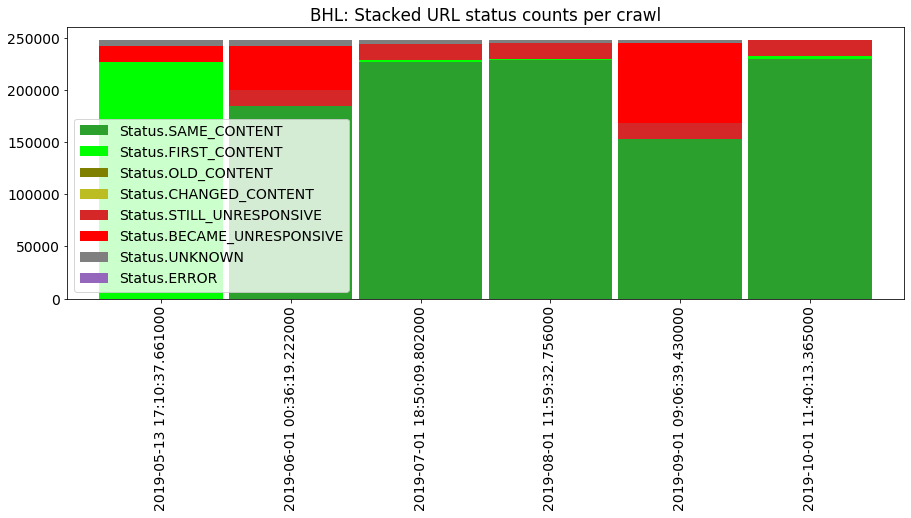

In [93]:
figureTitle = observatoryName + ": Stacked URL status counts per crawl"
outputFile = outputPath + "stacked-query-status-counts-per-crawl"

ax = fig_df.plot(
    kind="bar",
    stacked=True,
    width=.95,
    color=status_color_map,
    figsize=(15, 5),
    legend=False
);

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.legend()
plt.savefig(outputFile[:-4] + "-annotated.png", dpi=figureDpi);

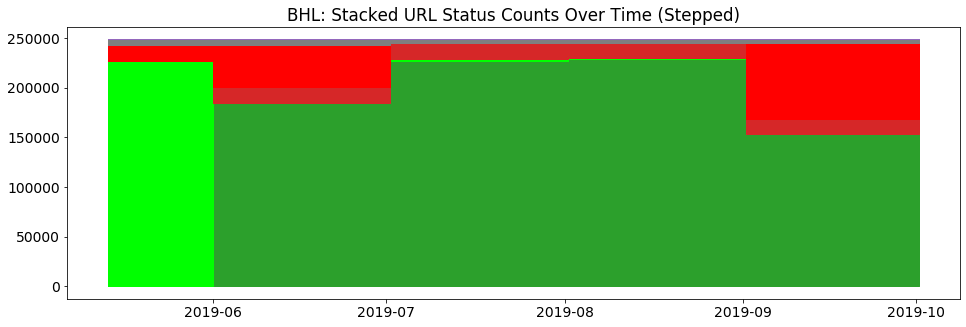

In [94]:
figureTitle = observatoryName + ": Stacked URL Status Counts Over Time (Stepped)"
outputFile = outputPath + "stacked-query-status-counts-over-time"

fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(111)

# Fill in space between lines
x = fig_df.index.append(pd.Index([datetime.datetime.now()]))
y1 = pd.Series({ q : 0 for q in x })

columns = fig_df.columns
n = len(columns)
for i in range(0, n):
    y2 = y1 + fig_df[columns[i]] + 0
    ax.fill_between(x, y1, y2, step="post", color=status_color_map[i])
    y1 = y2

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.savefig(outputFile[:-4] + "-annotated.png", dpi=figureDpi);

In [95]:
crawl_status_totals_df

,Status.UNKNOWN,Status.FIRST_CONTENT,Status.SAME_CONTENT,Status.CHANGED_CONTENT,Status.OLD_CONTENT,Status.BECAME_UNRESPONSIVE,Status.STILL_UNRESPONSIVE,Status.ERROR
2019-05-13 17:10:37.661,6011,227043,0,0,0,15460,0,0
2019-06-01 00:36:19.222,6011,33,184881,1,0,42161,15427,0
2019-07-01 18:50:09.802,4061,1983,227048,5,0,17,15400,0
2019-08-01 11:59:32.756,3505,561,228952,43,0,67,15386,0
2019-09-01 09:06:39.430,3504,1,153437,9,0,76134,15429,0
2019-10-01 11:40:13.365,336,3443,229513,12,0,77,15133,0


In [96]:
crawl_health_df = pd.DataFrame(index=crawl_status_totals_df.index)

crawl_health_df["Available URLs"] = crawl_status_totals_df[[
    Status.FIRST_CONTENT,
    Status.SAME_CONTENT,
    Status.CHANGED_CONTENT,
    Status.OLD_CONTENT
]].sum(axis=1)

crawl_health_df["Stable URLs"] = crawl_status_totals_df[[
    Status.FIRST_CONTENT,
    Status.SAME_CONTENT,
    Status.CHANGED_CONTENT,
    Status.OLD_CONTENT
]].sum(axis=1)

crawl_health_df

,Available URLs,Stable URLs
2019-05-13 17:10:37.661,227043,227043
2019-06-01 00:36:19.222,184915,184915
2019-07-01 18:50:09.802,229036,229036
2019-08-01 11:59:32.756,229556,229556
2019-09-01 09:06:39.430,153447,153447
2019-10-01 11:40:13.365,232968,232968


## Running URL and content totals

In [98]:
crawlUrlTotals = [0] * numCrawls
crawlDatasetTotals = [0] * numCrawls
crawlAbandonedTotals = [0] * numCrawls
crawlFirstResponseTotals = [0] * numCrawls
crawlFirstBreakTotals = [0] * numCrawls
crawlFirstChangeTotals = [0] * numCrawls
crawlFirstUnreliableTotals = [0] * numCrawls

numUnresponsive = 0
numResponsive = 0
numStable = 0
numReliable = 0
numAbandoned = 0

totalNumResolves = 0
totalNumBreaks = 0
totalNumContents = 0
totalNumContentChanges = 0
maxNumContentChanges = 0

maxNumBreaks   = totalNumUrls * (np.ceil(numCrawls / 2)) # Round up; if the responsiveness is [0, 1, 0] across three crawls, there are at most two breaks
maxNumContents = totalNumUrls * (numCrawls)

breakCounts = []
contentChangeCounts = []

for _, lifetime in urlLifetimes.items():
    #if lifetime.firstCrawlPosition:
    crawlUrlTotals[lifetime.firstCrawlPosition] += 1

    totalNumResolves += lifetime.numResolves
    totalNumBreaks += lifetime.numBreaks
    totalNumContents += lifetime.numContents
    totalNumContentChanges += lifetime.numContentChanges
    maxNumContentChanges += lifetime.numResolves - 1

    breakCounts.append(lifetime.numBreaks)
    contentChangeCounts.append(lifetime.numContentChanges)

    if lifetime.numBreaks == 0:
        numResponsive += 1

    if lifetime.numContents == 1:
        numStable += 1

    if lifetime.numBreaks == 0 and lifetime.numContents == 1:
        numReliable += 1

    if lifetime.lastKnownStatus in (Status.BECAME_UNRESPONSIVE, Status.STILL_UNRESPONSIVE):
        numUnresponsive += 1

    firstUnreliable = numCrawls
    if lifetime.firstResponsePosition is not None:
        crawlFirstResponseTotals[lifetime.firstResponsePosition] += 1
    
    if lifetime.firstBreakPosition is not None:
        crawlFirstBreakTotals[lifetime.firstBreakPosition] += 1
        firstUnreliable = lifetime.firstBreakPosition

    if lifetime.firstChangePosition is not None:
        crawlFirstChangeTotals[lifetime.firstChangePosition] += 1
        firstUnreliable = min(lifetime.firstChangePosition, firstUnreliable)
    
    if firstUnreliable < numCrawls:
        crawlFirstUnreliableTotals[firstUnreliable] += 1

    # If the URL stopped being queried, find out when
    for i, status in enumerate(lifetime.statuses[::-1]):
        if status != Status.UNKNOWN:
            break

    if i > 0:
        crawlAbandonedTotals[numCrawls - i] += 1
        numAbandoned += 1

for _, lifetime in contentLifetimes.items():
    #if lifetime.firstCrawlPosition:
    crawlDatasetTotals[lifetime.firstCrawlPosition] += 1

reallyBads = list()
for url, lifetime in urlLifetimes.items():
    skip = False
    for status in lifetime.statuses:
        if status not in (Status.BECAME_UNRESPONSIVE, Status.STILL_UNRESPONSIVE, Status.UNKNOWN):
            skip = True
            break
    if not skip:
        reallyBads.append((url, lifetime))
numNeverResponded = len(reallyBads)
numResponded = totalNumUrls - numNeverResponded

numUnreliable = totalNumUrls - numReliable
numUnstable = totalNumUrls - numStable
numUnresponsive = totalNumUrls - numResponsive

np.save(outputPath + "totals", {
    "totalNumUrls" : totalNumUrls,
    "totalNumResolves" : totalNumResolves,
    "totalNumBreaks" : totalNumBreaks,
    "totalNumContents" : totalNumContents,
    "totalNumContentChanges" : totalNumContentChanges,
    "maxNumContentChanges" : maxNumContentChanges,
    "numNeverResponded" : numNeverResponded,
    "numUnreliable" : numUnreliable,
    "numUnstable" : numUnstable,
    "numUnresponsive" : numUnresponsive,
})

In [99]:
textReport = ""

# Totals
textReport += ("Of all %s observed URLs,\n"
    % ("{0:,}".format(totalNumUrls)))
textReport += ("\t%s of URLs (%s total) were responsive\n"
    % ("{0:.2%}".format(numResponsive / totalNumUrls), "{0:,}".format(numResponsive)))
textReport += ("\t%s of URLs (%s total) were stable\n"
    % ("{0:.2%}".format(numStable / numResponded), "{0:,}".format(numStable)))
textReport += ("\t%s of URLs (%s total) were reliable (both responsive and stable)\n"
    % ("{0:.2%}".format(numReliable / totalNumUrls), "{0:,}".format(numReliable)))
textReport += ("\t%s of URLs (%s total) were responsive in the last crawl\n"
    % ("{0:.2%}".format(numUnresponsive / totalNumUrls), "{0:,}".format(numUnresponsive)))
textReport += ("\t%s of URLs (%s total) never responded in any crawl\n"
    % ("{0:.2%}".format(numNeverResponded / totalNumUrls), "{0:,}".format(numNeverResponded)))
textReport += ("\t%s of URLs (%s total) were abandoned\n"
    % ("{0:.2%}".format(numAbandoned / totalNumUrls), "{0:,}".format(numAbandoned)))

# Unreliable URLs
textReport += "\n"
textReport += ("Of the %s unreliable URLs,\n"
    % ("{0:,}".format(numUnreliable)))
textReport += ("\t%s of unreliable URLs (%s total) were not always responsive\n"
    % ("{0:.2%}".format(numUnresponsive / numUnreliable), "{0:,}".format(numUnresponsive)))
textReport += ("\t%s of unreliable URLs (%s total) were not always stable\n"
    % ("{0:.2%}".format(numUnstable / numUnreliable), "{0:,}".format(numUnstable)))

# Behavior
textReport += "\n"
textReport += ("URLs break %s of the time between queries\n"
    % ("{0:.2%}".format(totalNumBreaks / (totalNumResolves + totalNumBreaks))))
textReport += ("URLs contents change %s of the time between queries\n"
    % ("{0:.2%}".format(totalNumContentChanges / maxNumContentChanges)))

file = open(outputPath + "report.txt", "w+")
file.write(textReport)
file.close()

print(textReport)

Of all 248,514 observed URLs,
	57.41% of URLs (142,673 total) were responsive
	99.97% of URLs (232,991 total) were stable
	57.39% of URLs (142,629 total) were reliable (both responsive and stable)
	42.59% of URLs (105,841 total) were responsive in the last crawl
	6.22% of URLs (15,450 total) never responded in any crawl
	0.14% of URLs (336 total) were abandoned

Of the 105,885 unreliable URLs,
	99.96% of unreliable URLs (105,841 total) were not always responsive
	14.66% of unreliable URLs (15,523 total) were not always stable

URLs break 9.63% of the time between queries
URLs contents change 0.01% of the time between queries



In [100]:
breakCountFrequencies = np.unique(breakCounts, return_counts=True)
np.save(outputPath + "url-break-frequencies.npy", breakCountFrequencies)

In [101]:
rc("text", usetex=True)
rc("savefig", format="pdf", dpi=figureDpi)
rc("font", size=14, family="serif", serif="Computer Modern")
# rc('font', **{'family' : 'serif', 'serif' : ['Computer Modern Roman']})

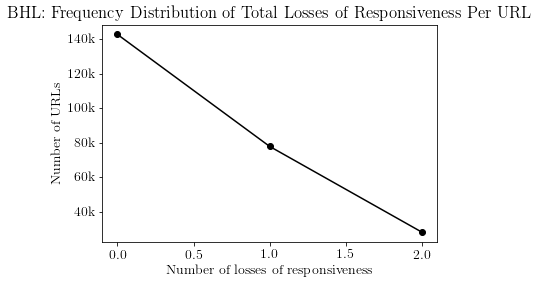

In [102]:
if INTERACTIVE:
    figureTitle = observatoryName + ": Frequency Distribution of Total Losses of Responsiveness Per URL"
    outputFile = outputPath + "url-break-freq-dist"

    plt.plot(
        breakCountFrequencies[0],
        breakCountFrequencies[1],
        "-o",
        color="black"
    );
    ax = plt.gca()

    plt.xlabel("Number of losses of responsiveness");
    plt.ylabel("Number of URLs");

    ax.set_yticklabels(["{:,}k".format(int(y / 1000)) for y in plt.yticks()[0]]);

    # Bare
    plt.savefig(outputFile, dpi=figureDpi);

    # Annotated
    plt.title(figureTitle)
    plt.savefig(outputFile + "-annotated", dpi=figureDpi);

In [103]:
contentChangeCountFrequencies = np.unique(contentChangeCounts, return_counts=True)
np.save(outputPath + "url-content-change-frequencies.npy", contentChangeCountFrequencies)

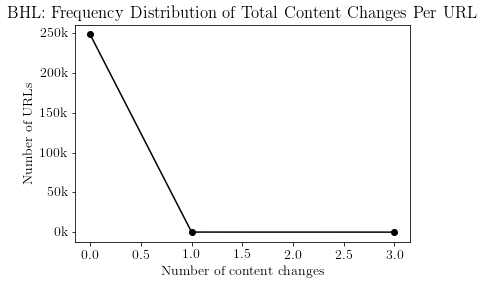

In [104]:
if INTERACTIVE:
    figureTitle = observatoryName + ": Frequency Distribution of Total Content Changes Per URL"
    outputFile = outputPath + "url-content-change-freq-dist"

    plt.plot(
        contentChangeCountFrequencies[0],
        contentChangeCountFrequencies[1],
        "-o",
        color="black"
    );
    ax = plt.gca()

    plt.xlabel("Number of content changes");
    plt.ylabel("Number of URLs");

    ax.set_yticklabels(["{:,}k".format(int(y / 1000)) for y in plt.yticks()[0]]);

    # Bare
    plt.savefig(outputFile, dpi=figureDpi);

    # Annotated
    plt.title(figureTitle)
    plt.savefig(outputFile + "-annotated", dpi=figureDpi);

In [105]:
maxCount = max(len(breakCountFrequencies[0]), len(contentChangeCountFrequencies[0]))

frequencies_df = pd.DataFrame(
    columns=["Unresolvable", "Changed Content"],
    index=range(maxCount),
    data=0
)

for i, numBreaks in enumerate(breakCountFrequencies[0]):
    numUrls = breakCountFrequencies[1][i]
    frequencies_df["Unresolvable"][numBreaks] = numUrls

for i, numChanges in enumerate(contentChangeCountFrequencies[0]):
    numUrls = contentChangeCountFrequencies[1][i]
    frequencies_df["Changed Content"][numChanges] = numUrls

frequencies_df

,Unresolvable,Changed Content
0,142673,248446
1,77766,67
2,28075,0


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


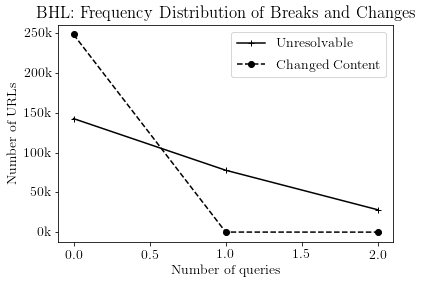

In [106]:
figureTitle = observatoryName + ": Frequency Distribution of Breaks and Changes"
outputFile = outputPath + "url-behavior-freq-dist"

ax = frequencies_df.plot(
    color="black",
    style=["-+", "--o"],
    legend=False
);

plt.ylabel("Number of URLs");
plt.xlabel("Number of queries");

ax.set_yticklabels(["{:,}k".format(int(y / 1000)) for y in plt.yticks()[0]]);

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.legend()
plt.savefig(outputFile + "-annotated", dpi=figureDpi);

In [111]:
crawl_totals_df = pd.DataFrame(
    index   = [datetime.datetime.strptime(str(x[1]), "\"%Y-%m-%dT%H:%M:%S.%fZ\"^^<http://www.w3.org/2001/XMLSchema#dateTime>") for x in crawlDates],
)

crawl_totals_df["New URLs"] = crawlUrlTotals
crawl_totals_df["New Contents"] = crawlDatasetTotals
crawl_totals_df["Abandoned"] = crawlAbandonedTotals
crawl_totals_df["First Response"] = crawlFirstResponseTotals
crawl_totals_df["First Break"] = crawlFirstBreakTotals
crawl_totals_df["First Change"] = crawlFirstChangeTotals
crawl_totals_df["First Unreliable"] = crawlFirstUnreliableTotals
crawl_totals_df["Total URLs"] = crawl_totals_df["New URLs"].cumsum()
crawl_totals_df["Total Contents"] = crawl_totals_df["New Contents"].cumsum()
crawl_totals_df["Total Abandoned"] = crawl_totals_df["Abandoned"].cumsum()
crawl_totals_df["Total Responded"] = crawl_totals_df["First Response"].cumsum()
crawl_totals_df["Total Intermittent"] = crawl_totals_df["First Break"].cumsum()
crawl_totals_df["Total Unstable"] = crawl_totals_df["First Change"].cumsum()
crawl_totals_df["Total Unreliable"] = crawl_totals_df["First Unreliable"].cumsum()
crawl_totals_df["Percent Responsive"] = 1 - crawl_totals_df["Total Intermittent"] / crawl_totals_df["Total URLs"]
crawl_totals_df["Percent Stable"] = 1 - crawl_totals_df["Total Unstable"] / crawl_totals_df["Total Responded"]
crawl_totals_df["Percent Reliable"] = 1 - crawl_totals_df["Total Unreliable"] / crawl_totals_df["Total URLs"]

crawl_totals_df

,New URLs,New Contents,Abandoned,First Response,First Break,First Change,First Unreliable,Total URLs,Total Contents,Total Abandoned,Total Responded,Total Intermittent,Total Unstable,Total Unreliable,Percent Responsive,Percent Stable,Percent Reliable
2019-05-13 17:10:37.661,242503,226861,0,227043,15460,0,15460,242503,226861,0,227043,15460,0,15460,0.936248,1.000000,0.936248
2019-06-01 00:36:19.222,0,34,0,33,42161,1,42162,242503,226895,0,227076,57621,1,57622,0.762391,0.999996,0.762386
2019-07-01 18:50:09.802,1981,1982,31,1983,17,5,20,244484,228877,31,229059,57638,6,57642,0.764246,0.999974,0.764230
2019-08-01 11:59:32.756,581,601,25,561,56,42,94,245065,229478,56,229620,57694,48,57736,0.764577,0.999791,0.764405
2019-09-01 09:06:39.430,1,10,0,1,48071,9,48068,245066,229488,56,229621,105765,57,105804,0.568422,0.999752,0.568263
2019-10-01 11:40:13.365,3448,3455,280,3443,76,11,77,248514,232943,336,233064,105841,68,105881,0.574104,0.999708,0.573944


In [112]:
timeFrame = [
    datetime.datetime.strptime(startDate, "\"%Y-%m-%d"),
    datetime.datetime.strptime(endDate, "\"%Y-%m-%d")
]

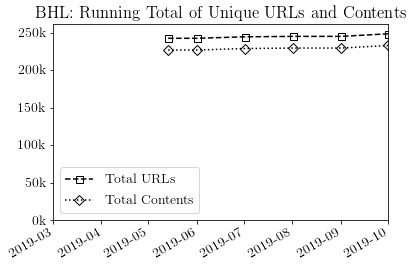

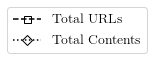

In [113]:
figureTitle = observatoryName + ": Running Total of Unique URLs and Contents"
outputFile = outputPath + "running-total-urls-and-contents"

df = crawl_totals_df[[
    "Total URLs",
    "Total Contents",
#     "Total Abandoned"
]]

ax = df.plot(
    color="black",
    style=["--", ":", "-"],
    legend=False,
    fillstyle="none",
    markersize=7
);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(["s", "D"][i])

plt.xlim(timeFrame);
plt.ylim([0, max(df.max()) * 1.05])

ax.set_yticklabels(["{:,}k".format(int(y / 1000)) for y in plt.yticks()[0]]);

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
plt.legend()
plt.savefig(outputFile + "-annotated", dpi=figureDpi);

# Export legend (https://stackoverflow.com/a/50279532)
figsize = (2.2, .75)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center')
# hide the axes frame and the x/y labels
ax_leg.axis('off')
fig_leg.savefig(outputFile + "-legend")

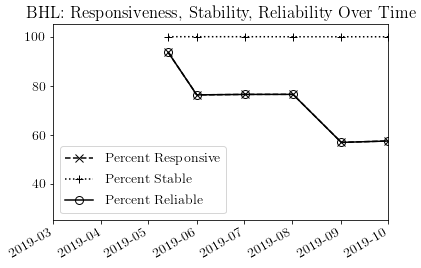

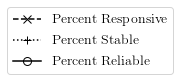

In [114]:
figureTitle = observatoryName + ": Responsiveness, Stability, Reliability Over Time"
outputFile = outputPath + "reliability-over-time"

ax = crawl_totals_df[[
    "Percent Responsive",
    "Percent Stable",
    "Percent Reliable"
]].plot(
    color="black",
    style=["--", ":", "-"],
    legend=False,
    fillstyle="none",
    markersize=8
);
for i, line in enumerate(ax.get_lines()):
    line.set_marker(["x", "+", "o"][i])

plt.xlim(timeFrame);
plt.ylim([.25, 1.05]);
ax.set_yticklabels(["{:.0%}".format(float(y)) for y in plt.yticks()[0]]);

# Bare
plt.savefig(outputFile, dpi=figureDpi);

# Annotated
plt.title(figureTitle)
leg = plt.legend()
plt.savefig(outputFile + "-annotated");

# Export legend (https://stackoverflow.com/a/50279532)
figsize = (2.5, 1)
fig_leg = plt.figure(figsize=figsize)
ax_leg = fig_leg.add_subplot(111)
# add the legend from the previous axes
ax_leg.legend(*ax.get_legend_handles_labels(), loc='center')
# hide the axes frame and the x/y labels
ax_leg.axis('off')
fig_leg.savefig(outputFile + "-legend")

In [115]:
print("Done!")

Done!
